<a href="https://colab.research.google.com/github/annefitterer/annefitterer/blob/main/Microeconomics_Programming_Anne_Fitterer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First-best effort a^FB: 0.452
First-best compensation W(a^FB): 1.107


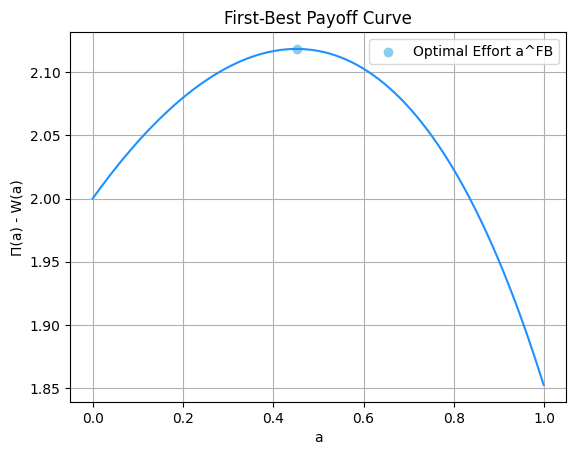

<ipython-input-1-21a64f1dbac0>:41: RuntimeWarning: overflow encountered in exp
  return 1 + (1 / beta) * np.exp(1 / beta) * (-integral_value)
<ipython-input-1-21a64f1dbac0>:41: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 + (1 / beta) * np.exp(1 / beta) * (-integral_value)
<ipython-input-1-21a64f1dbac0>:41: RuntimeWarning: overflow encountered in scalar multiply
  return 1 + (1 / beta) * np.exp(1 / beta) * (-integral_value)


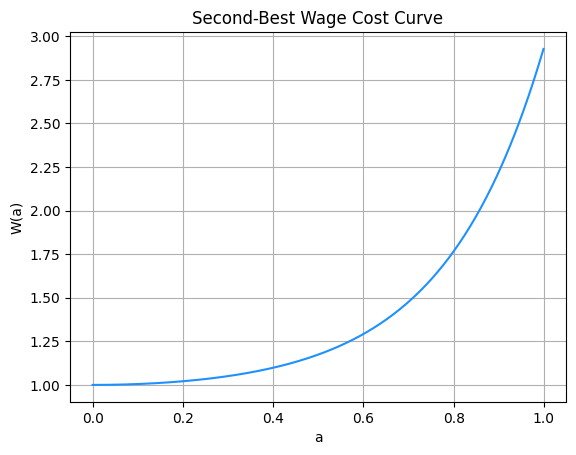

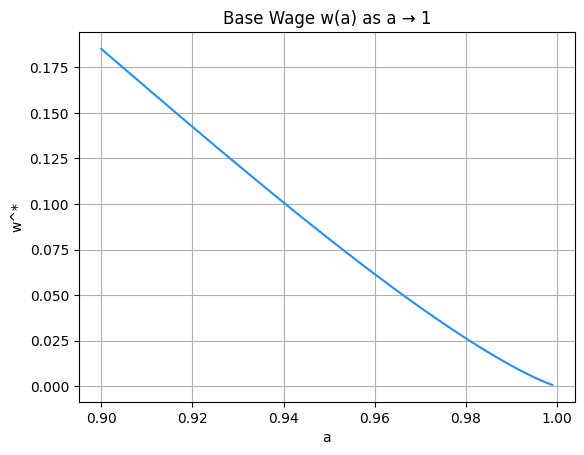

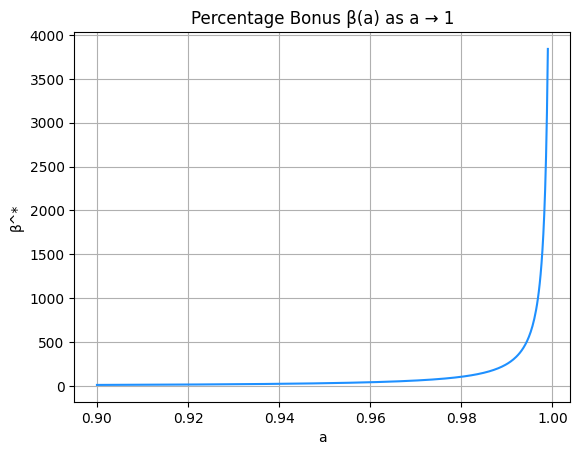

Second-best effort a^SB: 0.360
Second-best base wage w(a^SB): 0.921
Second-best percentage bonus β(a^SB): 0.169
Second-best compensation W(a^SB): 1.077


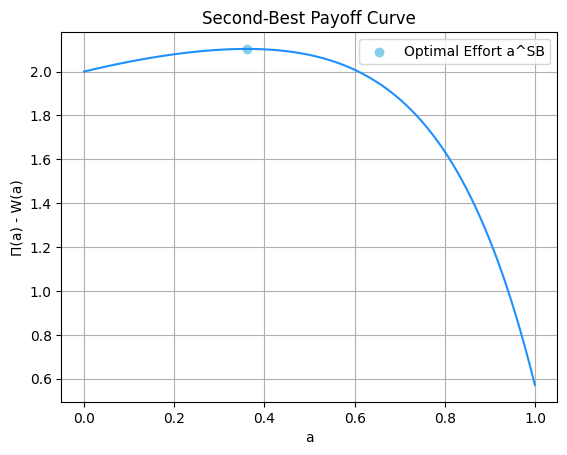

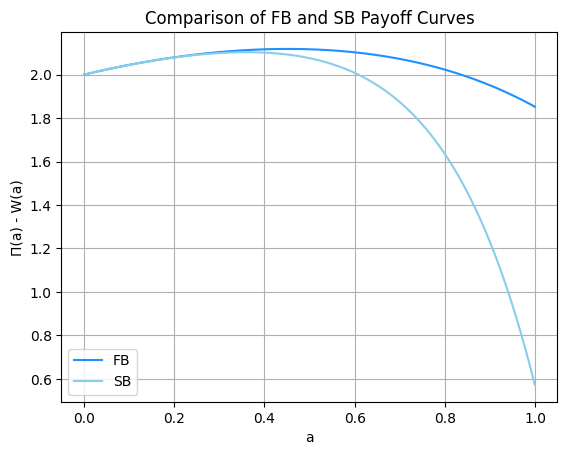

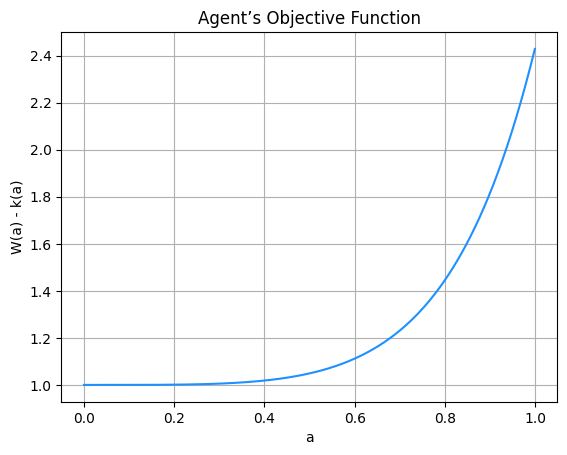

LHS < RHS -> FOA is not valid


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve, minimize_scalar
from scipy.integrate import quad

# Colors
color_1 = '#1E90FF'  # Dodger Blue
color_2 = '#87CEEB'  # Sky Blue

# Parameters
Pi = lambda a: 3 + (a / 2)
W = lambda a: np.exp((a ** 2) / 2)
Payoff_Principal = lambda a: Pi(a) - W(a)

# Task 1: First-Best Solution
foc = lambda a: (1 / 2) - a * np.exp((a ** 2) / 2)
a_FB = fsolve(foc, 0.5)[0]
W_FB = W(a_FB)
print(f"First-best effort a^FB: {a_FB:.3f}")
print(f"First-best compensation W(a^FB): {W_FB:.3f}")

# Payoff Curve for Principal under FB
a_vals = np.linspace(0, 0.999, 500)
payoff_vals_principal_FB = Payoff_Principal(a_vals)

# Plot 1: Payoff Curve (FB)
plt.figure()
plt.plot(a_vals, payoff_vals_principal_FB, color=color_1, linewidth=1.5)
plt.scatter([a_FB], [Payoff_Principal(a_FB)], color=color_2, label="Optimal Effort a^FB")
plt.xlabel('a')
plt.ylabel('Π(a) - W(a)')
plt.title('First-Best Payoff Curve')
plt.grid()
plt.legend()
plt.show()

# Task 2: Minimum Wage Cost for Second-Best Solution
def G_beta(beta):
    integrand = lambda t: np.exp(-t) / t
    integral_value, _ = quad(integrand, 1 / beta, np.inf, limit=100, epsrel=1e-6)
    return 1 + (1 / beta) * np.exp(1 / beta) * (-integral_value)

beta_vals, w_vals, W_vals = [], [], []
for a in a_vals:
    beta_opt = minimize_scalar(lambda b: abs(G_beta(b) - a**2), bounds=(1e-6, 20000), method='bounded').x
    w = np.exp((a ** 2) / 2 - beta_opt * (1 - a ** 2))
    W_sb = (1 + beta_opt) * w
    beta_vals.append(beta_opt)
    w_vals.append(w)
    W_vals.append(W_sb)

# Plot 2: Wage Cost W(a)
plt.figure()
plt.plot(a_vals, W_vals, color=color_1, linewidth=1.5)
plt.xlabel('a')
plt.ylabel('W(a)')
plt.title('Second-Best Wage Cost Curve')
plt.grid()
plt.show()

# Task 3: Contract Parameters as a → 1
a_vals_lim = np.linspace(0.9, 0.999, 500)
beta_vals_lim, w_vals_lim = [], []
for a in a_vals_lim:
    beta_opt = minimize_scalar(lambda b: abs(G_beta(b) - a**2), bounds=(1e-6, 20000), method='bounded').x
    w = np.exp((a ** 2) / 2 - beta_opt * (1 - a ** 2))
    beta_vals_lim.append(beta_opt)
    w_vals_lim.append(w)

# Plot 3: w(a) as a → 1
plt.figure()
plt.plot(a_vals_lim, w_vals_lim, color=color_1, linewidth=1.5)
plt.xlabel('a')
plt.ylabel('w^*')
plt.title('Base Wage w(a) as a → 1')
plt.grid()
plt.show()

# Plot 4: β(a) as a → 1
plt.figure()
plt.plot(a_vals_lim, beta_vals_lim, color=color_1, linewidth=1.5)
plt.xlabel('a')
plt.ylabel('β^*')
plt.title('Percentage Bonus β(a) as a → 1')
plt.grid()
plt.show()

# Task 4: Second-Best Payoff Curve
payoff_vals_principal_SB = Pi(a_vals) - np.array(W_vals)
optimal_idx = np.argmax(payoff_vals_principal_SB)
a_SB = a_vals[optimal_idx]
beta_SB = beta_vals[optimal_idx]
w_SB = w_vals[optimal_idx]
W_SB = W_vals[optimal_idx]
payoff_SB = payoff_vals_principal_SB[optimal_idx]

print(f"Second-best effort a^SB: {a_SB:.3f}")
print(f"Second-best base wage w(a^SB): {w_SB:.3f}")
print(f"Second-best percentage bonus β(a^SB): {beta_SB:.3f}")
print(f"Second-best compensation W(a^SB): {W_SB:.3f}")

# Plot 5: Payoff Curve (SB)
plt.figure()
plt.plot(a_vals, payoff_vals_principal_SB, color=color_1, linewidth=1.5)
plt.scatter([a_SB], [payoff_SB], color=color_2, label="Optimal Effort a^SB")
plt.xlabel('a')
plt.ylabel('Π(a) - W(a)')
plt.title('Second-Best Payoff Curve')
plt.grid()
plt.legend()
plt.show()

# Plot 6: Compare FB and SB Payoff Curves
plt.figure()
plt.plot(a_vals, payoff_vals_principal_FB, color=color_1, linewidth=1.5, label='FB')
plt.plot(a_vals, payoff_vals_principal_SB, color=color_2, linewidth=1.5, label='SB')
plt.xlabel('a')
plt.ylabel('Π(a) - W(a)')
plt.title('Comparison of FB and SB Payoff Curves')
plt.grid()
plt.legend()
plt.show()

# Task 5: Agent's Objective Function
k_vals = (a_vals**2) / 2
payoff_vals_agent_SB = np.array(W_vals) - k_vals

# Plot 7: Agent's Payoff Curve
plt.figure()
plt.plot(a_vals, payoff_vals_agent_SB, color=color_1, linewidth=1.5)
plt.xlabel('a')
plt.ylabel('W(a) - k(a)')
plt.title('Agent’s Objective Function')
plt.grid()
plt.show()

# Concavity Check
lambda_ = 0.5
idx_a, idx_b = 200, 400
idx_c = int(idx_a + lambda_ * (idx_b - idx_a))
LHS = payoff_vals_agent_SB[idx_c]
RHS = lambda_ * payoff_vals_agent_SB[idx_a] + (1 - lambda_) * payoff_vals_agent_SB[idx_b]
if LHS >= RHS:
    print("LHS >= RHS -> FOA might be valid")
else:
    print("LHS < RHS -> FOA is not valid")